In [28]:
import tensorflow as tf 
from tensorflow.keras import datasets,layers,models



## 一、准备数据

In [29]:
BATCH_SIZE = 100

def load_image(img_path,size = (32,32)):
    label = tf.constant(1,tf.int8) if tf.strings.regex_full_match(img_path,".*automobile.*") \
            else tf.constant(0,tf.int8)
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img) #注意此处为jpeg格式
    img = tf.image.resize(img,size)/255.0
    return(img,label)

In [30]:
# tf.data.experimental.AUTOTUNE

In [31]:
#使用并行化预处理num_parallel_calls 和预存数据prefetch来提升性能
ds_train = tf.data.Dataset.list_files("./data/cifar2/train/*/*.jpg") \
           .map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
           .shuffle(buffer_size = 1000).batch(BATCH_SIZE) \
           .prefetch(tf.data.experimental.AUTOTUNE)  

ds_test = tf.data.Dataset.list_files("./data/cifar2/test/*/*.jpg") \
           .map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE) \
           .batch(BATCH_SIZE) \
           .prefetch(tf.data.experimental.AUTOTUNE)  

In [58]:
print(len(list(ds_train)),len(list(ds_train.unbatch())))

100 10000


In [64]:
ds_train

<PrefetchDataset shapes: ((None, 32, 32, None), (None,)), types: (tf.float32, tf.int8)>

In [63]:
list(ds_train)

[(<tf.Tensor: shape=(100, 32, 32, 3), dtype=float32, numpy=
  array([[[[0.41960785, 0.4117647 , 0.32156864],
           [0.4745098 , 0.47058824, 0.3882353 ],
           [0.5882353 , 0.6       , 0.53333336],
           ...,
           [0.28235295, 0.3019608 , 0.3764706 ],
           [0.2509804 , 0.25490198, 0.37254903],
           [0.25490198, 0.25490198, 0.3882353 ]],
  
          [[0.3882353 , 0.38431373, 0.3019608 ],
           [0.5647059 , 0.5764706 , 0.49411765],
           [0.8117647 , 0.827451  , 0.76862746],
           ...,
           [0.26666668, 0.2901961 , 0.3529412 ],
           [0.25882354, 0.2627451 , 0.37254903],
           [0.20392157, 0.20784314, 0.32941177]],
  
          [[0.49411765, 0.50980395, 0.44313726],
           [0.5921569 , 0.627451  , 0.56078434],
           [0.6666667 , 0.7058824 , 0.6627451 ],
           ...,
           [0.19215687, 0.20392157, 0.2627451 ],
           [0.3137255 , 0.31764707, 0.4       ],
           [0.26666668, 0.26666668, 0.36862746]],
 

In [52]:
list(ds_train.take(5))

[(<tf.Tensor: shape=(100, 32, 32, 3), dtype=float32, numpy=
  array([[[[0.92941177, 0.94509804, 0.8862745 ],
           [0.92156863, 0.9372549 , 0.8784314 ],
           [0.90588236, 0.92941177, 0.8745098 ],
           ...,
           [0.84313726, 0.8862745 , 0.85490197],
           [0.85490197, 0.8980392 , 0.8666667 ],
           [0.8627451 , 0.90588236, 0.8745098 ]],
  
          [[0.9490196 , 0.9647059 , 0.90588236],
           [0.9411765 , 0.95686275, 0.8980392 ],
           [0.9372549 , 0.9529412 , 0.8980392 ],
           ...,
           [0.8509804 , 0.89411765, 0.8627451 ],
           [0.85882354, 0.9019608 , 0.87058824],
           [0.87058824, 0.9137255 , 0.88235295]],
  
          [[0.96862745, 0.98039216, 0.9137255 ],
           [0.9647059 , 0.9764706 , 0.9098039 ],
           [0.9607843 , 0.96862745, 0.9137255 ],
           ...,
           [0.8666667 , 0.90588236, 0.8745098 ],
           [0.8745098 , 0.9137255 , 0.88235295],
           [0.88235295, 0.92156863, 0.8901961 ]],
 

In [54]:
list(ds_train.unbatch().take(9))

[(<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
  array([[[0.29803923, 0.24313726, 0.29411766],
          [0.23529412, 0.18039216, 0.23137255],
          [0.28235295, 0.21176471, 0.26666668],
          ...,
          [0.34509805, 0.24313726, 0.28627452],
          [0.32156864, 0.21960784, 0.25490198],
          [0.2627451 , 0.16078432, 0.19607843]],
  
         [[0.30588236, 0.24313726, 0.29411766],
          [0.23921569, 0.1764706 , 0.22745098],
          [0.25490198, 0.18431373, 0.23921569],
          ...,
          [0.22745098, 0.1254902 , 0.16862746],
          [0.25882354, 0.15686275, 0.19215687],
          [0.27058825, 0.16862746, 0.20392157]],
  
         [[0.22352941, 0.15294118, 0.20784314],
          [0.1764706 , 0.09411765, 0.15294118],
          [0.17254902, 0.09411765, 0.14117648],
          ...,
          [0.23529412, 0.13333334, 0.1764706 ],
          [0.25490198, 0.14901961, 0.18431373],
          [0.20392157, 0.09803922, 0.13333334]],
  
         ...,
  
       

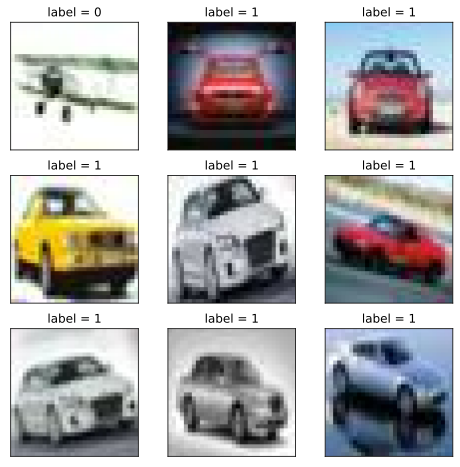

In [33]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#查看部分样本
from matplotlib import pyplot as plt 

plt.figure(figsize=(8,8)) 
for i,(img,label) in enumerate(ds_train.unbatch().take(9)):
    ax=plt.subplot(3,3,i+1)
    ax.imshow(img.numpy())
    ax.set_title("label = %d"%label)
    ax.set_xticks([])
    ax.set_yticks([]) 
plt.show()

In [34]:
for x,y in ds_train.take(1):
    print(x.shape,y.shape)
    print(x)
    print(y)

(100, 32, 32, 3) (100,)
tf.Tensor(
[[[[0.9882353  1.         1.        ]
   [0.9882353  1.         1.        ]
   [0.9882353  1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.9882353  1.         1.        ]
   [0.9882353  1.         1.        ]
   [0.9882353  1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.99607843 1.         1.        ]
   [0.99607843 1.         1.        ]
   [0.99607843 1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.99607843 1.         1.        ]
   [0.99607843 1.         1.        ]
   [0.99607843 1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.9960

## 二、定义模型

In [35]:
tf.keras.backend.clear_session() #清空会话

inputs = layers.Input(shape=(32,32,3))
x = layers.Conv2D(32,kernel_size=(3,3))(inputs)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(64,kernel_size=(5,5))(x)
x = layers.MaxPool2D()(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Flatten()(x)
x = layers.Dense(32,activation='relu')(x)
outputs = layers.Dense(1,activation = 'sigmoid')(x)

model = models.Model(inputs = inputs,outputs = outputs)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)             

## 三、训练模型

In [36]:
import datetime
import os

stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join('data', 'autograph', stamp)

## 在 Python3 下建议使用 pathlib 修正各操作系统的路径
# from pathlib import Path
# stamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# logdir = str(Path('./data/autograph/' + stamp))

tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss=tf.keras.losses.binary_crossentropy,
        metrics=["accuracy"]
    )

history = model.fit(ds_train,epochs= 10,validation_data=ds_test,
                    callbacks = [tensorboard_callback],workers = 4)


Epoch 1/10
100/100 [==============================] - 3s 26ms/step - loss: 0.4545 - accuracy: 0.7860 - val_loss: 0.3358 - val_accuracy: 0.8535
Epoch 2/10
100/100 [==============================] - 2s 25ms/step - loss: 0.3296 - accuracy: 0.8573 - val_loss: 0.2688 - val_accuracy: 0.8860
Epoch 3/10
100/100 [==============================] - 2s 25ms/step - loss: 0.2748 - accuracy: 0.8823 - val_loss: 0.2279 - val_accuracy: 0.9075
Epoch 4/10
100/100 [==============================] - 3s 26ms/step - loss: 0.2355 - accuracy: 0.9037 - val_loss: 0.2139 - val_accuracy: 0.9085
Epoch 5/10
100/100 [==============================] - 3s 25ms/step - loss: 0.2022 - accuracy: 0.9181 - val_loss: 0.1904 - val_accuracy: 0.9230
Epoch 6/10
100/100 [==============================] - 3s 27ms/step - loss: 0.1783 - accuracy: 0.9288 - val_loss: 0.1807 - val_accuracy: 0.9260
Epoch 7/10
100/100 [==============================] - 3s 28ms/step - loss: 0.1590 - accuracy: 0.9334 - val_loss: 0.1717 - val_accuracy: 0.9325

## 四、评估模型

In [37]:
from tensorboard import notebook
notebook.list() 

Known TensorBoard instances:
  - port 6007: logdir ./data/autograph/ (started 18:58:52 ago; pid 16737)
  - port 6008: logdir ./data/keras_model (started 0:07:28 ago; pid 32736)
  - port 6006: logdir ./data/keras_model (started 23:47:04 ago; pid 23265)


In [38]:
#在tensorboard中查看模型
notebook.start("--logdir ./data/keras_model")

Reusing TensorBoard on port 6008 (pid 32736), started 0:07:28 ago. (Use '!kill 32736' to kill it.)

In [39]:
import pandas as pd 
dfhistory = pd.DataFrame(history.history)
dfhistory.index = range(1,len(dfhistory) + 1)
dfhistory.index.name = 'epoch'

dfhistory

,loss,accuracy,val_loss,val_accuracy
epoch,,,,
1,0.454530,0.7860,0.335826,0.8535
2,0.329576,0.8573,0.268771,0.8860
3,0.274785,0.8823,0.227928,0.9075
4,0.235456,0.9037,0.213907,0.9085
5,0.202197,0.9181,0.190356,0.9230
6,0.178303,0.9288,0.180746,0.9260
7,0.159043,0.9334,0.171673,0.9325
8,0.143585,0.9428,0.188594,0.9225
9,0.127938,0.9498,0.169017,0.9355


In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

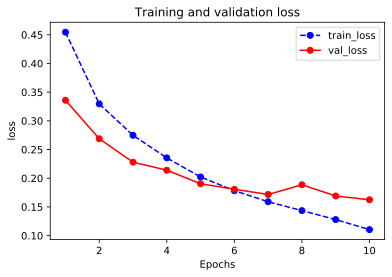

In [41]:
plot_metric(history,"loss")

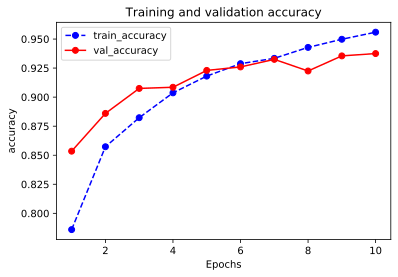

In [42]:
plot_metric(history,"accuracy")

In [43]:
#可以使用evaluate对数据进行评估
val_loss,val_accuracy = model.evaluate(ds_test,workers=4)
print(val_loss,val_accuracy)

20/20 [==============================] - 0s 7ms/step - loss: 0.1624 - accuracy: 0.9375
0.1624370664358139 0.9375


## 五、使用模型

In [44]:
model.predict(ds_test)

array([[2.3394644e-02],
       [9.9996531e-01],
       [3.5261184e-02],
       ...,
       [3.5183132e-03],
       [8.0493093e-04],
       [1.3676286e-04]], dtype=float32)

In [67]:
for x,y in ds_train.take(1):
#     print(x)
    print(model.predict_on_batch(x),len(model.predict_on_batch(x)))

[[1.50741249e-01]
 [5.37202954e-02]
 [9.69457507e-01]
 [1.61852539e-02]
 [9.04926360e-02]
 [9.94606137e-01]
 [7.29262829e-03]
 [7.41448224e-01]
 [3.60643566e-02]
 [7.19094574e-02]
 [9.98308718e-01]
 [9.77052569e-01]
 [4.92176414e-03]
 [2.51948833e-03]
 [1.08593689e-04]
 [9.99914348e-01]
 [9.37037468e-02]
 [7.64218032e-01]
 [9.99985754e-01]
 [9.99922991e-01]
 [1.68263912e-04]
 [9.89455342e-01]
 [9.99999225e-01]
 [5.70833683e-04]
 [1.39981508e-04]
 [1.68537557e-01]
 [9.96549249e-01]
 [9.63745475e-01]
 [8.25968385e-03]
 [1.69546008e-02]
 [9.35651660e-01]
 [1.21433735e-02]
 [2.21014023e-04]
 [9.99935627e-01]
 [5.55908382e-02]
 [9.94045615e-01]
 [2.77587771e-03]
 [5.88840246e-03]
 [9.99979854e-01]
 [9.96475458e-01]
 [9.84478354e-01]
 [8.69391351e-06]
 [1.26463175e-03]
 [9.25037265e-01]
 [9.99014080e-01]
 [8.00067484e-02]
 [9.99168158e-01]
 [8.98899198e-01]
 [2.05111802e-02]
 [9.99962926e-01]
 [3.95950675e-03]
 [5.74384630e-02]
 [9.99784768e-01]
 [9.68166828e-01]
 [8.02112818e-01]
 [3.545543

## 六、保存模型

In [68]:
# 保存权重，该方式仅仅保存权重张量
model.save_weights('./data/tf_model_weights.ckpt',save_format = "tf")

In [69]:
# 保存模型结构与模型参数到文件,该方式保存的模型具有跨平台性便于部署

model.save('./data/tf_model_savedmodel', save_format="tf")
print('export saved model.')

model_loaded = tf.keras.models.load_model('./data/tf_model_savedmodel')
model_loaded.evaluate(ds_test)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./data/tf_model_savedmodel/assets
export saved model.
20/20 [==============================] - 0s 7ms/step - loss: 0.1624 - accuracy: 0.9375


[0.1624370664358139, 0.9375]